# LSTM

## 로이터 뉴스 데이터셋 불러오기

In [1]:
from tensorflow.keras.datasets import reuters

(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=1000, test_split=0.2)

In [2]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

x_train = pad_sequences(x_train, maxlen=100)
x_test = pad_sequences(x_test, maxlen=100)

In [3]:
from keras.utils import np_utils

y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

## 모델 설정

In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM

model = Sequential()
model.add(Embedding(1000, 100)) # 불러온 단어의 총 개수, 기사당 단어 수
model.add(LSTM(100, activation='tanh'))
model.add(Dense(46, activation='softmax'))

In [5]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

hitory = model.fit(x_train, y_train, batch_size=100, epochs=20, validation_data=(x_test, y_test))

print('\n Test Accuracy: %.4f' % (model.evaluate(x_test, y_test)[1]))

Epoch 1/20
90/90 [==============================] - 15s 151ms/step - loss: 2.5997 - accuracy: 0.3406 - val_loss: 2.3584 - val_accuracy: 0.4163
Epoch 2/20
90/90 [==============================] - 16s 173ms/step - loss: 2.0571 - accuracy: 0.4796 - val_loss: 1.9117 - val_accuracy: 0.5125
Epoch 3/20
90/90 [==============================] - 16s 178ms/step - loss: 1.8180 - accuracy: 0.5284 - val_loss: 1.7828 - val_accuracy: 0.5396
Epoch 4/20
90/90 [==============================] - 16s 177ms/step - loss: 1.7521 - accuracy: 0.5500 - val_loss: 1.7333 - val_accuracy: 0.5610
Epoch 5/20
90/90 [==============================] - 18s 195ms/step - loss: 1.6233 - accuracy: 0.5803 - val_loss: 1.7067 - val_accuracy: 0.5730
Epoch 6/20
90/90 [==============================] - 17s 185ms/step - loss: 1.6257 - accuracy: 0.5806 - val_loss: 1.7195 - val_accuracy: 0.5476
Epoch 7/20
90/90 [==============================] - 17s 191ms/step - loss: 1.5564 - accuracy: 0.5855 - val_loss: 1.5629 - val_accuracy: 0.6015

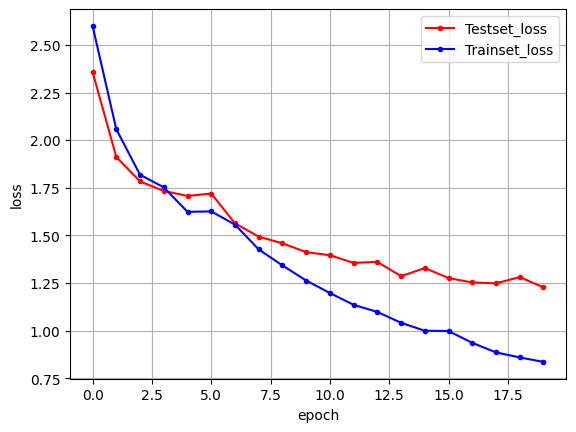

In [7]:
y_vloss = hitory.history['val_loss']
y_loss = hitory.history['loss']

import numpy as np
import matplotlib.pyplot as plt
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c='red', label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c='blue', label='Trainset_loss')

plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()